# Normal AutoEncoder

Noiseを入れたデータセットからオリジナルの学習データに近づけるのではなく、
データ拡張したデータセットから、その拡張されたデータに再構成していくタイプ

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
# from torchvision import datasets, transforms
import dataset
import mainmodel
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_curve
from LossFunction import SSIMLoss #自作Loss関数

In [4]:

Dataset = dataset.dataset("Obrid_AE", "data")
Dataset.concat_data("sample_data",500)
Dataset = dataset.dataset("Obrid_AE", "test")
print("----------------------")
Dataset.concat_data("sample_test",100)
print("----------------------")
data = Dataset.read_savedata("sample_test")
print(data.shape[0])
print("----------------------")
data, test_data , anomaly_data= Dataset.read_traindata("sample_data", "sample_test", 1000, 512, 1)


(500, 256)
(500, 256)
----------------------
(100, 256)
(100, 256)
----------------------
(100, 256)
100
----------------------
(500, 256)
(100, 256)
1148 0
rate 0.9
data.shape[0]: 500
rate 450
TrainData (10, 512, 1, 1, 256)
TestData (50, 256)
ÄnomalyDta (100, 256)


In [5]:

losslist=[]

model = mainmodel.Autoencoder_batchnorm()
criterion = nn.MSELoss()
# criterion = SSIMLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

outputs = []
#テンソル型に変換
data = torch.from_numpy(data.astype(np.float32)).clone()
for epoch in data:
    for data in epoch:
        recon = model(data)
        # print("type:recon_data{}".format(type(recon)))
        loss = criterion(recon, data)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

#     print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    # print('Loss:{:.4f}'.format(float(loss)))
    losslist.append(loss)
    outputs.append((epoch, data, recon))

In [6]:

folder_name = "tyuudenkou"
model_name = "Normal_AE_CNN"
ModelEdit = mainmodel.Modeledit(folder_name,model_name)
ModelEdit.save_model(model)

<class 'torch.Tensor'>


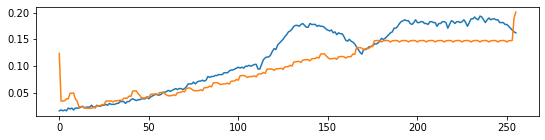

normal:6.434239510446787


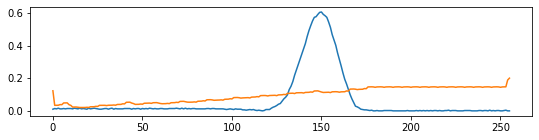

anomarly:27.835611172951758
anomaly
<class 'torch.Tensor'>


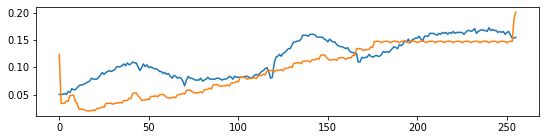

normal:6.791215367615223


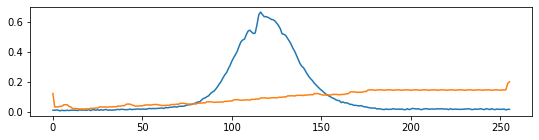

anomarly:32.68551604449749
anomaly
<class 'torch.Tensor'>


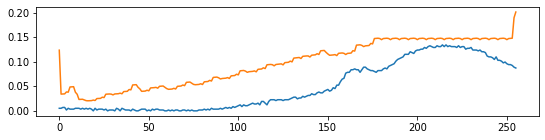

normal:12.21205560490489
anomaly


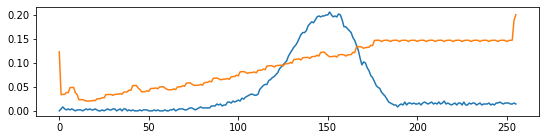

anomarly:18.25636117719114
anomaly
<class 'torch.Tensor'>


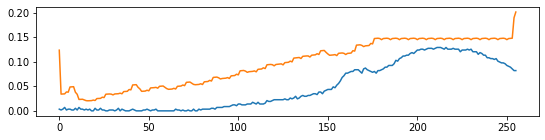

normal:12.424599120393395
anomaly


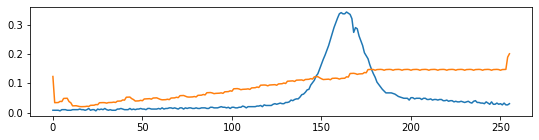

anomarly:17.899466754868627
anomaly
<class 'torch.Tensor'>


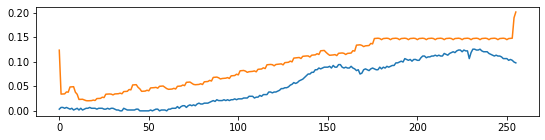

normal:10.393240206874907
anomaly


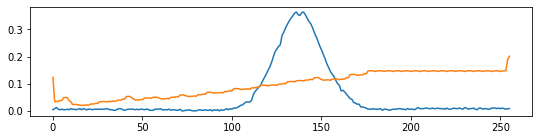

anomarly:23.56312431022525
anomaly


IndexError: index 50 is out of bounds for axis 0 with size 50

In [7]:
# num = 5

for i in range(anomaly_data.shape[0]):
    try:
        if i % 10 == 0:
            data0 =  torch.from_numpy((test_data[i]).astype(np.float32)).clone()
            test0 =  torch.from_numpy((anomaly_data[i]).astype(np.float32)).clone()
            print(type(data0))
            plt.figure(figsize=(9, 2))
            # data = data0.numpy()
            data = data0[np.newaxis, np.newaxis, :]
            recon = model(data).detach().numpy()
            plt.plot(data0.numpy())
            plt.plot(recon.flatten())
            plt.show()
            
            anomalypoint=sum(abs(recon.flatten()-data0.numpy()))
            print("normal:"+str(anomalypoint))
            if(anomalypoint>10):
                print("anomaly")
                
            plt.figure(figsize=(9, 2))
            # data = test0.numpy()
            data = test0[np.newaxis, np.newaxis, :]
            recon = model(data).detach().numpy()
            plt.plot(test0.numpy(),label="testdata")
            plt.plot(recon.flatten(),label="recondata")
            plt.show()
            
            anomalypoint=sum(abs(recon.flatten()-test0.numpy()))
            print("anomarly:"+str(anomalypoint))
            if(anomalypoint>10):
                print("anomaly")
    except IndexError:
        print("Finish")
        break

# oc-svm

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
# from torchvision import datasets, transforms
import dataset
import mainmodel
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_curve

In [9]:
import dataloader

Dataset = dataset.dataset("Obrid_AE", "data")
data, test_data , anomaly_data= Dataset.read_traindata_ocs("sample_data", "sample_test", 1000, 256, 1)

input_model = mainmodel.Autoencoder_cnn()
input_model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_model = mainmodel.Autoencoder_cnn().to(device)
input_model.load_state_dict(torch.load("/Users/yukihorikawa/Desktop/LAB_LAST/AutoEncoder/program/syuron/model_data/20211206/newmodel.pth", map_location=device))

# input_model = model

recon_list, encoded_list, input_list = dataloader.ocsvm_dataset(input_model, data)
test_recon_list, test_encoded_list, test_input_list = dataloader.ocsvm_dataset(input_model, test_data)
anomaly_recon_list, anomaly_encoded_list, anomaly_input_list = dataloader.ocsvm_dataset(input_model, anomaly_data)

(500, 256)
(100, 256)
1148 0
rate 0.9
data.shape[0]: 500
rate 450
TrainData (450, 256)
TestData (50, 256)
ÄnomalyDta (100, 256)
--------1/450--------
--------2/450--------
--------3/450--------
--------4/450--------
--------5/450--------
--------6/450--------
--------9/450--------
--------10/450--------
--------12/450--------
--------15/450--------
--------18/450--------
--------20/450--------
--------25/450--------
--------30/450--------
--------36/450--------
--------45/450--------
--------50/450--------
--------60/450--------
--------75/450--------
--------90/450--------
--------100/450--------
--------150/450--------
--------180/450--------
--------225/450--------
--------250/450--------
--------300/450--------
recon_list:(450, 256)
encoded_list:(450, 3)
input_list:(450,)
--------1/50--------
--------2/50--------
--------4/50--------
--------5/50--------
--------10/50--------
--------20/50--------
--------25/50--------
recon_list:(50, 256)
encoded_list:(50, 3)
input_list:(50,)
----

/Users/yukihorikawa/Desktop/LAB_LAST/AutoEncoder/AutoEncoder/dataloader.py:35: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  input_list = np.array(input_list)
/Users/yukihorikawa/Desktop/LAB_LAST/AutoEncoder/AutoEncoder/dataloader.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  input_list = np.array(input_list)


y_pred_train:450 
y_pred_anomaly:[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] 
y_pred_outliers:[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1] 


/var/folders/gl/kcbdb7pj0yz8846ytcdrjm140000gn/T/ipykernel_2791/2985198829.py:62: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/var/folders/gl/kcbdb7pj0yz8846ytcdrjm140000gn/T/ipykernel_2791/2985198829.py:103: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


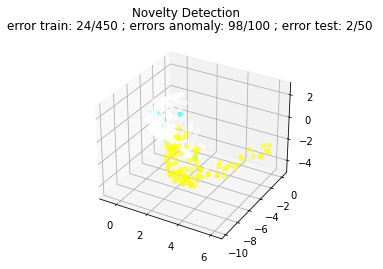

In [10]:
from sklearn.svm import OneClassSVM

X_anomaly = anomaly_encoded_list
X_test = test_encoded_list
X_train = encoded_list

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
from sklearn import svm
import matplotlib.font_manager
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

SPACE_SAMPLING_POINTS = 100
TRAIN_POINTS = 100

# Define the size of the space which is interesting for the example
X_MIN = -100
X_MAX = 100
Y_MIN = -100
Y_MAX = 100
Z_MIN = -100
Z_MAX = 100

# Generate a regular grid to sample the 3D space for various operations later
xx, yy, zz = np.meshgrid(np.linspace(X_MIN, X_MAX, SPACE_SAMPLING_POINTS),
                        np.linspace(Y_MIN, Y_MAX, SPACE_SAMPLING_POINTS),
                        np.linspace(Z_MIN, Z_MAX, SPACE_SAMPLING_POINTS))

# Generate some abnormal novel observations using a different distribution
X_outliers = np.random.uniform(low=-10, high=10, size=(20, 3))

# Create a OneClassSVM instance and fit it to the data
clf = svm.OneClassSVM(nu=0.009, kernel="rbf", gamma=0.8)
clf.fit(X_train)
# Predict the class of the various input creaxted before
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_anomaly = clf.predict(X_anomaly)
# y_pred_normal = clf.predict(X_anomaly)
y_pred_outliers = clf.predict(X_outliers)
print("y_pred_train:{} ".format(y_pred_train.shape[0] ))
print("y_pred_anomaly:{} ".format(y_pred_anomaly ))
print("y_pred_outliers:{} ".format(y_pred_outliers ))
# And compute classification error frequencies
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_anomaly = y_pred_anomaly[y_pred_anomaly == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
error_train = y_pred_train[y_pred_train == -1]
error_anomaly = y_pred_anomaly[y_pred_anomaly == -1]
error_test = y_pred_test[y_pred_test == 1]
# Calculate the distance from the separating hyperplane of the SVM for the
# whole space using the grid defined in the beginning
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)

# Create a figure with axes for 3D plotting
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.suptitle("Novelty Detection")

# Plot the different input points using 3D scatter plotting
b1 = ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c='white', alpha=0.5)
# ax.scatter(error_train[:, 0],error_train[:, 1], error_train[:, 2], c='black', alpha=0.5)
b2 = ax.scatter(X_anomaly[:, 0], X_anomaly[:, 1], X_anomaly[:, 2], c='yellow', alpha=0.5)
# ax.scatter(error_anomaly[:, 0],error_anomaly[:, 1], error_anomaly[:, 2], c='red', alpha=0.5)
c = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c='cyan', alpha=0.5)
# ax.scatter(error_test[:, 0],error_test[:, 1], error_test[:, 2], c='magenta', alpha=0.5)
# Plot the separating hyperplane by recreating the isosurface for the distance
# == 0 level in the distance grid computed through the decision function of the
# SVM. This is done using the marching cubes algorithm implementation from
# scikit-image.
# verts, faces = measure.marching_cubes(Z, 0)
# # Scale and transform to actual size of the interesting volume
# verts = verts * \
#     [X_MAX - X_MIN, Y_MAX - Y_MIN, Z_MAX - Z_MIN] / SPACE_SAMPLING_POINTS
# verts = verts + [X_MIN, Y_MIN, Z_MIN]
# # and create a mesh to display
# mesh = Poly3DCollection(verts[faces],
#                         facecolor='orange', edgecolor='gray', alpha=0.3)
# ax.add_collection3d(mesh)

# # Some presentation tweaks
# ax.set_xlim((-5, 5))
# ax.set_ylim((-5, 5))
# ax.set_zlim((-5, 5))

# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")
# ax.legend([mpatches.Patch(color='orange', alpha=0.3), b1, b2, c],
#     ["learned frontier", "training observations",
#     "new regular observations", "new abnormal observations"],
#     loc="lower left",
#     prop=matplotlib.font_manager.FontProperties(size=11))
ax.set_title(
    "error train: %d/%d ; errors anomaly: %d/%d ; "
    "error test: %d/%d "
    % (n_error_train, X_train.shape[0], n_error_anomaly, X_anomaly.shape[0], n_error_test, X_test.shape[0]))
fig.show()

## grid search original

# grid search

### ライブラリ使用

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = ['precision', 'recall']
nus = [0.001, 0.01, 0.1, 0.002, 0.02, 0.2, 1]
gammas = [0.001, 0.01, 0.1, 0.002, 0.02, 0.2, 1]
tuned_parameters = {'kernel' : ['rbf'], 'gamma' : gammas, 'nu': nus}
for score in scores:
    clf = GridSearchCV(svm.OneClassSVM(), tuned_parameters, cv=10,
                        scoring='%s_macro' % score, return_train_score=True)

    clf.fit(X_train)

    resultDf = pd.DataFrame(clf.cv_results_)
    print(resultDf[["mean_test_score", "std_test_score", "params"]].sort_values(by=["mean_test_score"], ascending=False).head())

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)

### オリジナルグリッドサーチ

In [ ]:
X_anomaly = anomaly_encoded_list
X_test = test_encoded_list
X_train = encoded_list
print("X_anomaly:{}, X_test:{}, X_train{}".format(X_anomaly.shape[0], X_test.shape[0], X_train.shape[0]))
span = 0.001
nus = np.arange(span, 0.01+span, span, dtype = 'float64')
print(nus)
gammas = np.arange(span, 0.01+span, span, dtype = 'float64')
point_test = X_test.shape[0]
point_test_def = 0
poit_error = 0
poit_error_def = X_anomaly.shape[0]
standar_point = 5
parameter = []


nus = [0.001, 0.01, 0.1, 0.002, 0.02, 0.2, 0.003, 0.03, 0.3, 0.004, 0.04, 0.4, 0.005, 0.05, 0.5, 0.006, 0.06, 0.6, 0.007, 0.07, 0.7, 0.008, 0.08, 0.8, 0.009, 0.09, 0.9, 1]
gammas = [0.001, 0.01, 0.1, 0.002, 0.02, 0.2, 0.003, 0.03, 0.3, 0.004, 0.04, 0.4, 0.005, 0.05, 0.5, 0.006, 0.06, 0.6, 0.007, 0.07, 0.7, 0.008, 0.08, 0.8, 0.009, 0.09, 0.9, 1]
num = len(nus)

for i in range(num):
    for j in range(num):
        clf = svm.OneClassSVM(nu=nus[i], kernel="rbf", gamma=gammas[j])
        clf.fit(X_train)
        y_pred_test = clf.predict(X_test)
        y_pred_anomaly = clf.predict(X_anomaly)
        n_error_test = y_pred_test[y_pred_test == -1].size
        n_error_anomaly = y_pred_anomaly[y_pred_anomaly == -1].size
        print("n_error_test{}".format(n_error_test))
        print("n_error_anomaly{}".format(n_error_anomaly))
        print("poit_error_def - n_error_anomaly{}".format(poit_error_def - n_error_anomaly))
        if standar_point > n_error_test + (poit_error_def - n_error_anomaly):
            parameter.append([nus[i], gammas[j], n_error_test+poit_error_def - n_error_anomaly])
            # standar_point = point_test + (poit_error_def - poit_error)
        # if poit_error < n_error_anomaly:
        #     poit_error = n_error_anomaly
        #     if point_test > n_error_test:
        #         point_test = n_error_test
        #         print("y_pred_test:{} ".format(point_test ))
        #         print("y_pred_anomaly:{} ".format(poit_error ))
        #         parameter.append([nus[i], gammas[j]])
        #         print("prameter{}".format(parameter))
                # standar_point = point_test + (poit_error_def - poit_error)
print(parameter)

In [ ]:
for i in range(anomaly_data.shape[0]):
    # if i % 10 == 0:
    data0 =  torch.from_numpy((test_data[i]).astype(np.float32)).clone()
    test0 =  torch.from_numpy((anomaly_data[i]).astype(np.float32)).clone()
    print(type(data0))
    plt.figure(figsize=(9, 2))
    # data = data0.numpy()
    data = data0[np.newaxis, np.newaxis, :]
    recon = input_model(data).detach().numpy()
    plt.plot(data0.numpy())
    plt.plot(recon.flatten())
    plt.show()
    
    anomalypoint=sum(abs(recon.flatten()-data0.numpy()))
    print("normal:"+str(anomalypoint))
    if(anomalypoint>10):
        print("anomaly")
        
    plt.figure(figsize=(9, 2))
    # data = test0.numpy()
    data = test0[np.newaxis, np.newaxis, :]
    recon = input_model(data).detach().numpy()
    plt.plot(test0.numpy(),label="testdata")
    plt.plot(recon.flatten(),label="recondata")
    plt.show()
    
    anomalypoint=sum(abs(recon.flatten()-test0.numpy()))
    print("anomarly:"+str(anomalypoint))
    if(anomalypoint>10):
        print("anomaly")

## 時間計測

### OCSVM

In [ ]:
from sklearn.svm import OneClassSVM

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
from sklearn import svm
import matplotlib.font_manager
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

import dataloader

In [ ]:
import dataloader

Dataset = dataset.dataset("Obrid_AE", "data")
data, test_data , anomaly_data= Dataset.read_traindata_ocs("sample_data", "sample_test", 1000, 256, 1)

input_model = mainmodel.Autoencoder2()
input_model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_model = mainmodel.Autoencoder2().to(device)
input_model.load_state_dict(torch.load("/Users/yukihorikawa/Desktop/LAB_LAST/AutoEncoder/program/syuron/model_data/20211206/newmodel.pth", map_location=device))

# input_model = model

recon_list, encoded_list, input_list = dataloader.ocsvm_dataset(input_model, data)
test_recon_list, test_encoded_list, test_input_list = dataloader.ocsvm_dataset(input_model, test_data)
anomaly_recon_list, anomaly_encoded_list, anomaly_input_list = dataloader.ocsvm_dataset(input_model, anomaly_data)

In [ ]:
import dataloader

#---------for AE------------
input_model = mainmodel.Autoencoder2()
input_model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_model = mainmodel.Autoencoder2().to(device)
input_model.load_state_dict(torch.load("/Users/yukihorikawa/Desktop/LAB_LAST/AutoEncoder/program/syuron/model_data/20211206/newmodel.pth", map_location=device))

Dataset = dataset.dataset("Obrid_AE", "data")
data, test_data , anomaly_data= Dataset.read_traindata("sample_data", "sample_test", 1000, 256, 1)

#---------for OCSVM------------

Dataset = dataset.dataset("Obrid_AE", "data")
ocs_data, ocs_test_data , ocs_anomaly_data= Dataset.read_traindata_ocs("sample_data", "sample_test", 1000, 256, 1)
recon_list, encoded_list, input_list = dataloader.ocsvm_dataset(input_model, ocs_data)
test_recon_list, test_encoded_list, test_input_list = dataloader.ocsvm_dataset(input_model, ocs_test_data)
anomaly_recon_list, anomaly_encoded_list, anomaly_input_list = dataloader.ocsvm_dataset(input_model, ocs_anomaly_data)

ocs_X_anomaly = anomaly_encoded_list
ocs_X_test = test_encoded_list
ocs_X_train = encoded_list
clf = svm.OneClassSVM(nu=0.009, kernel="rbf", gamma=0.8)
clf.fit(ocs_X_train)

#---------計測用---------
num = 100
len = ocs_X_train.shape[0]
# ocs_X_train = X_train[np.newaxis, :]#２次元のサイズでないとエラー

In [ ]:
import dataloader

Dataset = dataset.dataset("Obrid_AE", "data")
data, test_data , anomaly_data= Dataset.read_traindata_ocs("sample_data", "sample_test", 1000, 256, 1)

input_model = mainmodel.Autoencoder2()
input_model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_model = mainmodel.Autoencoder2().to(device)
input_model.load_state_dict(torch.load("/Users/yukihorikawa/Desktop/LAB_LAST/AutoEncoder/program/syuron/model_data/20211206/newmodel.pth", map_location=device))

# input_model = model

recon_list, encoded_list, input_list = dataloader.ocsvm_dataset(input_model, data)
test_recon_list, test_encoded_list, test_input_list = dataloader.ocsvm_dataset(input_model, test_data)
anomaly_recon_list, anomaly_encoded_list, anomaly_input_list = dataloader.ocsvm_dataset(input_model, anomaly_data)
X_train = encoded_list
X_train = X_train[np.newaxis, :]#２次元のサイズでないとエラー

In [ ]:
ocs_X_train.shape
ocs_X_train = X_train[np.newaxis, :]#２次元のサイズでないとエラー

### ocsvmの時間計測

In [ ]:
%%time
num = 100
len = X_train.shape[0]
for i in range(num):
    for i in range(len):
        y_pred_train = clf.predict(X_train[i])

### AEの時間計測

In [ ]:

Dataset = dataset.dataset("Obrid_AE", "data")
data, test_data , anomaly_data= Dataset.read_traindata("sample_data", "sample_test", 1000, 256, 1)
data =  torch.from_numpy((data).astype(np.float32)).clone()
print(data.shape)

In [ ]:

%%time
num = 100
for i in range(num):
    for i in range(len):
        y_pred_train = input_model(data[i]).detach().numpy()